NASA - Nearest Earth Objects

The dataset was downloaded from Kaggle website: https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

About Dataset:
There is an infinite number of objects in the outer space. Some of them are closer than we think. Even though we might think that a distance of 70,000 Km can not potentially harm us, but at an astronomical scale, this is a very small distance and can disrupt many natural phenomena. These objects/asteroids can thus prove to be harmful. Hence, it is wise to know what is surrounding us and what can harm us amongst those. Thus, this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object.



Fields description:

•	id: A unique identifier for the object.

•	name: The name of the object, often includes the year it was discovered and an additional identifier.

•	est_diameter_min: The minimum estimated diameter of the object in kilometers.

•	est_diameter_max: The maximum estimated diameter of the object in kilometers.

•	relative_velocity: The velocity of the object relative to Earth in kilometers per second.

•	miss_distance: The distance by which the object missed Earth in kilometers.

•	orbiting_body: The celestial body that the object orbits, in this case, Earth.

•	sentry_object: A boolean value (True/False) indicating whether the object is monitored by the Sentry system as potentially hazardous.

•	absolute_magnitude: The absolute magnitude of the object, a measure of its brightness.

•	hazardous: A boolean value (True/False) indicating whether the object is classified as potentially hazardous.


<span style="color:lightblue; font-size:26px;">1. Import all necessary libraries and load the dataset into a pandas DataFrame.</span>


In [87]:
#Libraries

#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

#data modeling
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV

##models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

##processing and optimization
### continuous variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler
### categorical variables
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
### optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



##pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

##metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score

##pickle file
import pickle


#settings parameters
pd.set_option('display.max_rows', None)
import time

In [3]:
# Load the CSV file
df = pd.read_csv('neo_v2.csv')


<span style="color:lightblue;font-size:26px;">2. Verify data structures and data types. Handle missing values and duplicates.</span>


In [4]:
# Display the first few rows of the data to see the data structure
df.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


In [5]:
# Display the shape of the dataframe
print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')

Total number of rows: 90836
Total number of columns: 10


<span style="color:yellow; font-size:16px;">As we can see above, the dataset contains only 10 columns and 90836 rows.</span>

In [6]:
# Display the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
# Check for missing values
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [8]:
# Check for duplicates
if df.duplicated().sum() > 0:
    print("There are duplicates in the data.")
else:
    print("There are no duplicates in the data.")

There are no duplicates in the data.


In [9]:
# Display the statistical summary of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


<span style="color:yellow; font-size:16px;">The above results show that scaling the data will be required, e.g. using MinMaxScaler or StandardScaler, but this can be done as part of our model processing.</span>

In [10]:
#check data types
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

<span style="color:lightblue; font-size:26px;">3. EDA.</span>

In [11]:
#define my own palette, inspired by Thor :)
# my colors
my_colors = {
    "lightning_blue": "#00AEEF",
    "metallic_silver": "#A7A9AC",
    "cosmic_black": "#1C1C1C",
    "lightning_gold": "#FFC000",
    "purple_glow": "#8E44AD",
    "burgundy_fire": "#8B0000",
    "earth_green": "#228B22",

    
}

# my color map
color_list = [
    my_colors["cosmic_black"],
    my_colors["metallic_silver"],
    my_colors["lightning_gold"],
    my_colors["burgundy_fire"],
]
custom_cmap = LinearSegmentedColormap.from_list("custom_map", color_list)

<span style="color:yellow; font-size:16px;">I decided to create my own pallete, inspired by Thor :) </span>

In [12]:
# unique values summary for each column
print(df.nunique())

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64


<span style="color:yellow; font-size:16px;">What we notice at first glance is that the number of unique objects (27423) is much smaller than the number of all rows in the entire set (90836). This indicates that some objects were monitored more than once and potentially different values ​​of the variables are recorded but we will check this in next steps.</span>

<span style="color:yellow; font-size:16px;">It is also interesting that "est_diameter_min" and "est_diameter_max" have the same number of unique values ​​(1638). These variables should be, very well correlated so probably one of them will not be included in the model, but we will check that later.</span>

<span style="color:yellow; font-size:16px;">Variables "orbiting_body" and "sentry_object" have only one unique value so we will not need them in modeling. </span>

In [13]:
#drop orbiting_body column and sentry_object column
df = df.drop(["orbiting_body", "sentry_object"], axis=1)

In [14]:
# unique object name for which hazardous is true
list(df[df['hazardous'] == True]['name'].unique())

['277475 (2005 WK4)',
 '(2014 GE35)',
 '(2020 OT6)',
 '506491 (2003 UW29)',
 '(2017 RV)',
 '20425 (1998 VD35)',
 '3362 Khufu (1984 QA)',
 '(2009 LW2)',
 '(2011 OB)',
 '(2020 AN3)',
 '85182 (1991 AQ)',
 '425755 (2011 CP4)',
 '(2012 TO139)',
 '(2013 US3)',
 '26663 (2000 XK47)',
 '230111 (2001 BE10)',
 '(2002 JE9)',
 '612358 (2002 JE9)',
 '(2016 CW137)',
 '(2022 BA)',
 '(2018 EJ4)',
 '509352 (2007 AG)',
 '385186 (1994 AW1)',
 '325395 (2009 CQ5)',
 '523804 (2000 YF29)',
 '348306 (2005 AY28)',
 '(2015 ME131)',
 '(2020 RX8)',
 '(2016 RT1)',
 '(2007 RF2)',
 '(2020 NK1)',
 '141432 (2002 CQ11)',
 '(2012 DK31)',
 '(2016 CL136)',
 '(2018 BT6)',
 '(2021 WC8)',
 '(2019 BT2)',
 '455176 (1999 VF22)',
 '(2017 YS8)',
 '483432 (2001 DF47)',
 '(2020 BJ4)',
 '(2001 CA21)',
 '482796 (2013 QJ10)',
 '(2012 KC6)',
 '(2015 BP515)',
 '(2016 DL)',
 '68372 (2001 PM9)',
 '(1995 CR)',
 '1620 Geographos (1951 RA)',
 '138971 (2001 CB21)',
 '(2014 CY4)',
 '162421 (2000 ET70)',
 '(2020 XK7)',
 '23187 (2000 PN9)',
 '290

In [15]:
# head all rows with id equal 90832
df[df['name'] == '277475 (2005 WK4)']

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
1,2277475,277475 (2005 WK4),0.2658,0.594347,73588.726663,6.143813e+07,20.0,True
2987,2277475,277475 (2005 WK4),0.2658,0.594347,61901.603043,4.524364e+07,20.0,True
6045,2277475,277475 (2005 WK4),0.2658,0.594347,50311.059979,2.916569e+07,20.0,True
9098,2277475,277475 (2005 WK4),0.2658,0.594347,39441.471833,1.413990e+07,20.0,True
12274,2277475,277475 (2005 WK4),0.2658,0.594347,29915.341374,9.011010e+06,20.0,True
15886,2277475,277475 (2005 WK4),0.2658,0.594347,24290.592492,2.113144e+07,20.0,True
18692,2277475,277475 (2005 WK4),0.2658,0.594347,19500.626054,3.856749e+07,20.0,True
19398,2277475,277475 (2005 WK4),0.2658,0.594347,26846.341154,3.231632e+07,20.0,True
21896,2277475,277475 (2005 WK4),0.2658,0.594347,22741.453456,4.538419e+07,20.0,True
23334,2277475,277475 (2005 WK4),0.2658,0.594347,29325.965639,3.883943e+07,20.0,True


<span style="color:yellow; font-size:16px;"> As we can see above, for example, the selected object 277475 (2005 WK 4) was monitored several times and always marked as hazardous. This information can help us a lot because, based on historical data, we can add a new feature to our dataset, e.g. "occurrence_hazardous" to potentially improve the predictability of the target variable (hazardous). In other words, if the object previously had classified as hazardous, there is a greater probability that subsequen will also be hazardous.</span>

In [16]:
# group by id and sum hazardous ( occurence of hazardous for each object)
df_grouped_id = df.groupby("id").sum()["hazardous"]

In [17]:
#check if the occurence of hazardous is greater than 1 for each id
df["occurrence_hazardous"] = df.apply(lambda row: df_grouped_id[row["id"]] > 1, axis="columns")

In [18]:
# print dataframe with new column "occurrence_hazardous"
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,occurrence_hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True,True


In [19]:
# check correlation between tracked occurence_hazardous and hazardous in percent
corr= df["occurrence_hazardous"].corr(df["hazardous"], method="spearman") *100
print("Spearman Correlation Between \"occurrence_hazardous\" and \"hazardous\":\n")
print(corr)

Spearman Correlation Between "occurrence_hazardous" and "hazardous":

97.16803297473297


<span style="color:yellow; font-size:16px;">We see now how the variables are highly correlated.</span>

In [20]:
# check how many occurence_hazardous are TURE or FALSE
print(df.groupby("occurrence_hazardous").sum()["hazardous"])

occurrence_hazardous
False     448
True     8392
Name: hazardous, dtype: int64


<span style="color:yellow; font-size:16px;">8392 hazardous objects "occurrence_hazardous' have been recorded as hazardous and only 448 are false for "occurrence_hazardous" or the only one observation of that id to be hazardous. This means that in the case of hazardous objects, it's very likely that there are multiple observations for that object.</span>

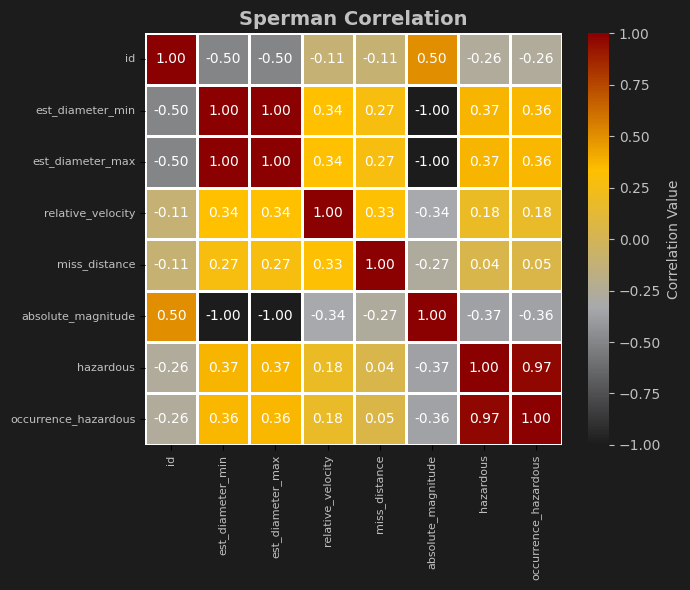

In [21]:
# df for correlation matrix
numeric_df = df.select_dtypes(include=[float, int, bool])

# correlation matrix chart
plt.figure(figsize=(7, 6))
plt.gcf().patch.set_facecolor(my_colors["cosmic_black"])  

heatmap = sns.heatmap(
    numeric_df.corr(method="spearman"),
    annot=True,
    fmt=".2f",
    linewidths=1,
    cmap=custom_cmap,
    annot_kws={"size": 10, "color": "white"},
    cbar_kws={"orientation": "vertical"}
)

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=10, colors="silver")  
colorbar.set_label("Correlation Value", color="silver", fontsize=10)

plt.gca().set_facecolor(my_colors["cosmic_black"])
plt.xticks(fontsize=8, color="silver")
plt.yticks(fontsize=8, color="silver")

plt.title("Sperman Correlation", color="silver", fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

<span style="color:yellow; font-size:16px;">As I expected, we have a strong correlation between est_diameter_min and est_diameter_mix. Interestingly, there is also a strong negative correlation between absolute_magnitude and est_diameter_min and est_diameter_mix. Since absolute_magnitude contains the same information as est_diameter_min and est_diameter_max, you can leave one of these variables (in this case I will leave absolute_magnitude) without losing information.Now let's see the distribution of objects marked as dangerous and objects that do not pose a threat to our planet..</span>

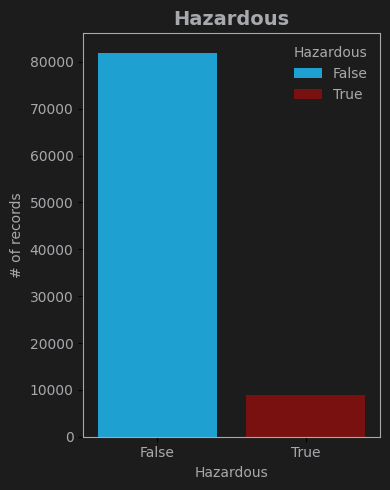

In [22]:

plt.figure(figsize=(4, 5))
plt.gcf().patch.set_facecolor(my_colors["cosmic_black"])
plt.gca().set_facecolor(my_colors["cosmic_black"]) 

sns.countplot(
    x='hazardous',
    data=df,
    hue='hazardous',
    palette=[my_colors["lightning_blue"], my_colors["burgundy_fire"]]
)

plt.title("Hazardous", color=my_colors["metallic_silver"], fontsize=14,fontweight='bold')
plt.xlabel("Hazardous", fontsize=10, color=my_colors["metallic_silver"])
plt.ylabel("# of records", fontsize=10, color=my_colors["metallic_silver"])
plt.xticks(fontsize=10, color=my_colors["metallic_silver"])
plt.yticks(fontsize=10, color=my_colors["metallic_silver"])

legend = plt.legend(title="Hazardous", frameon=False)
plt.setp(legend.get_texts(), color=my_colors["metallic_silver"])
plt.setp(legend.get_title(), color=my_colors["metallic_silver"])

ax = plt.gca()
ax.spines['bottom'].set_color(my_colors["metallic_silver"])
ax.spines['left'].set_color(my_colors["metallic_silver"])
ax.spines['top'].set_color(my_colors["metallic_silver"])
ax.spines['right'].set_color(my_colors["metallic_silver"])

plt.tight_layout()
plt.show()

In [23]:
# group hazardous and count
(df["hazardous"].value_counts()/len(df) * 100).round(2)

hazardous
False    90.27
True      9.73
Name: count, dtype: float64

<span style="color:yellow; font-size:16px;">We can immediately see a large disproportion in classes (unbalanced data set), 90% of objects were classified as False hazardous and only 10% as True hazardous. In such a case, the model may incorrectly classify objects that actually pose a true hazrdous as safe (FN) because it will ignore potential threats. The high accuracy of the model may mask its weaknesses in predicting the class of dangerous objects. It will be better to use metrics such as Recall, Precision, F1 score and ROC-AUC. How to deal with unbalanced classes? This can be done, for example, by oversampling the minority class or undersampling the majority class. We will make the decision while building the model. Let's also create a pairplot chart and let's see if we can find anything new. </span>

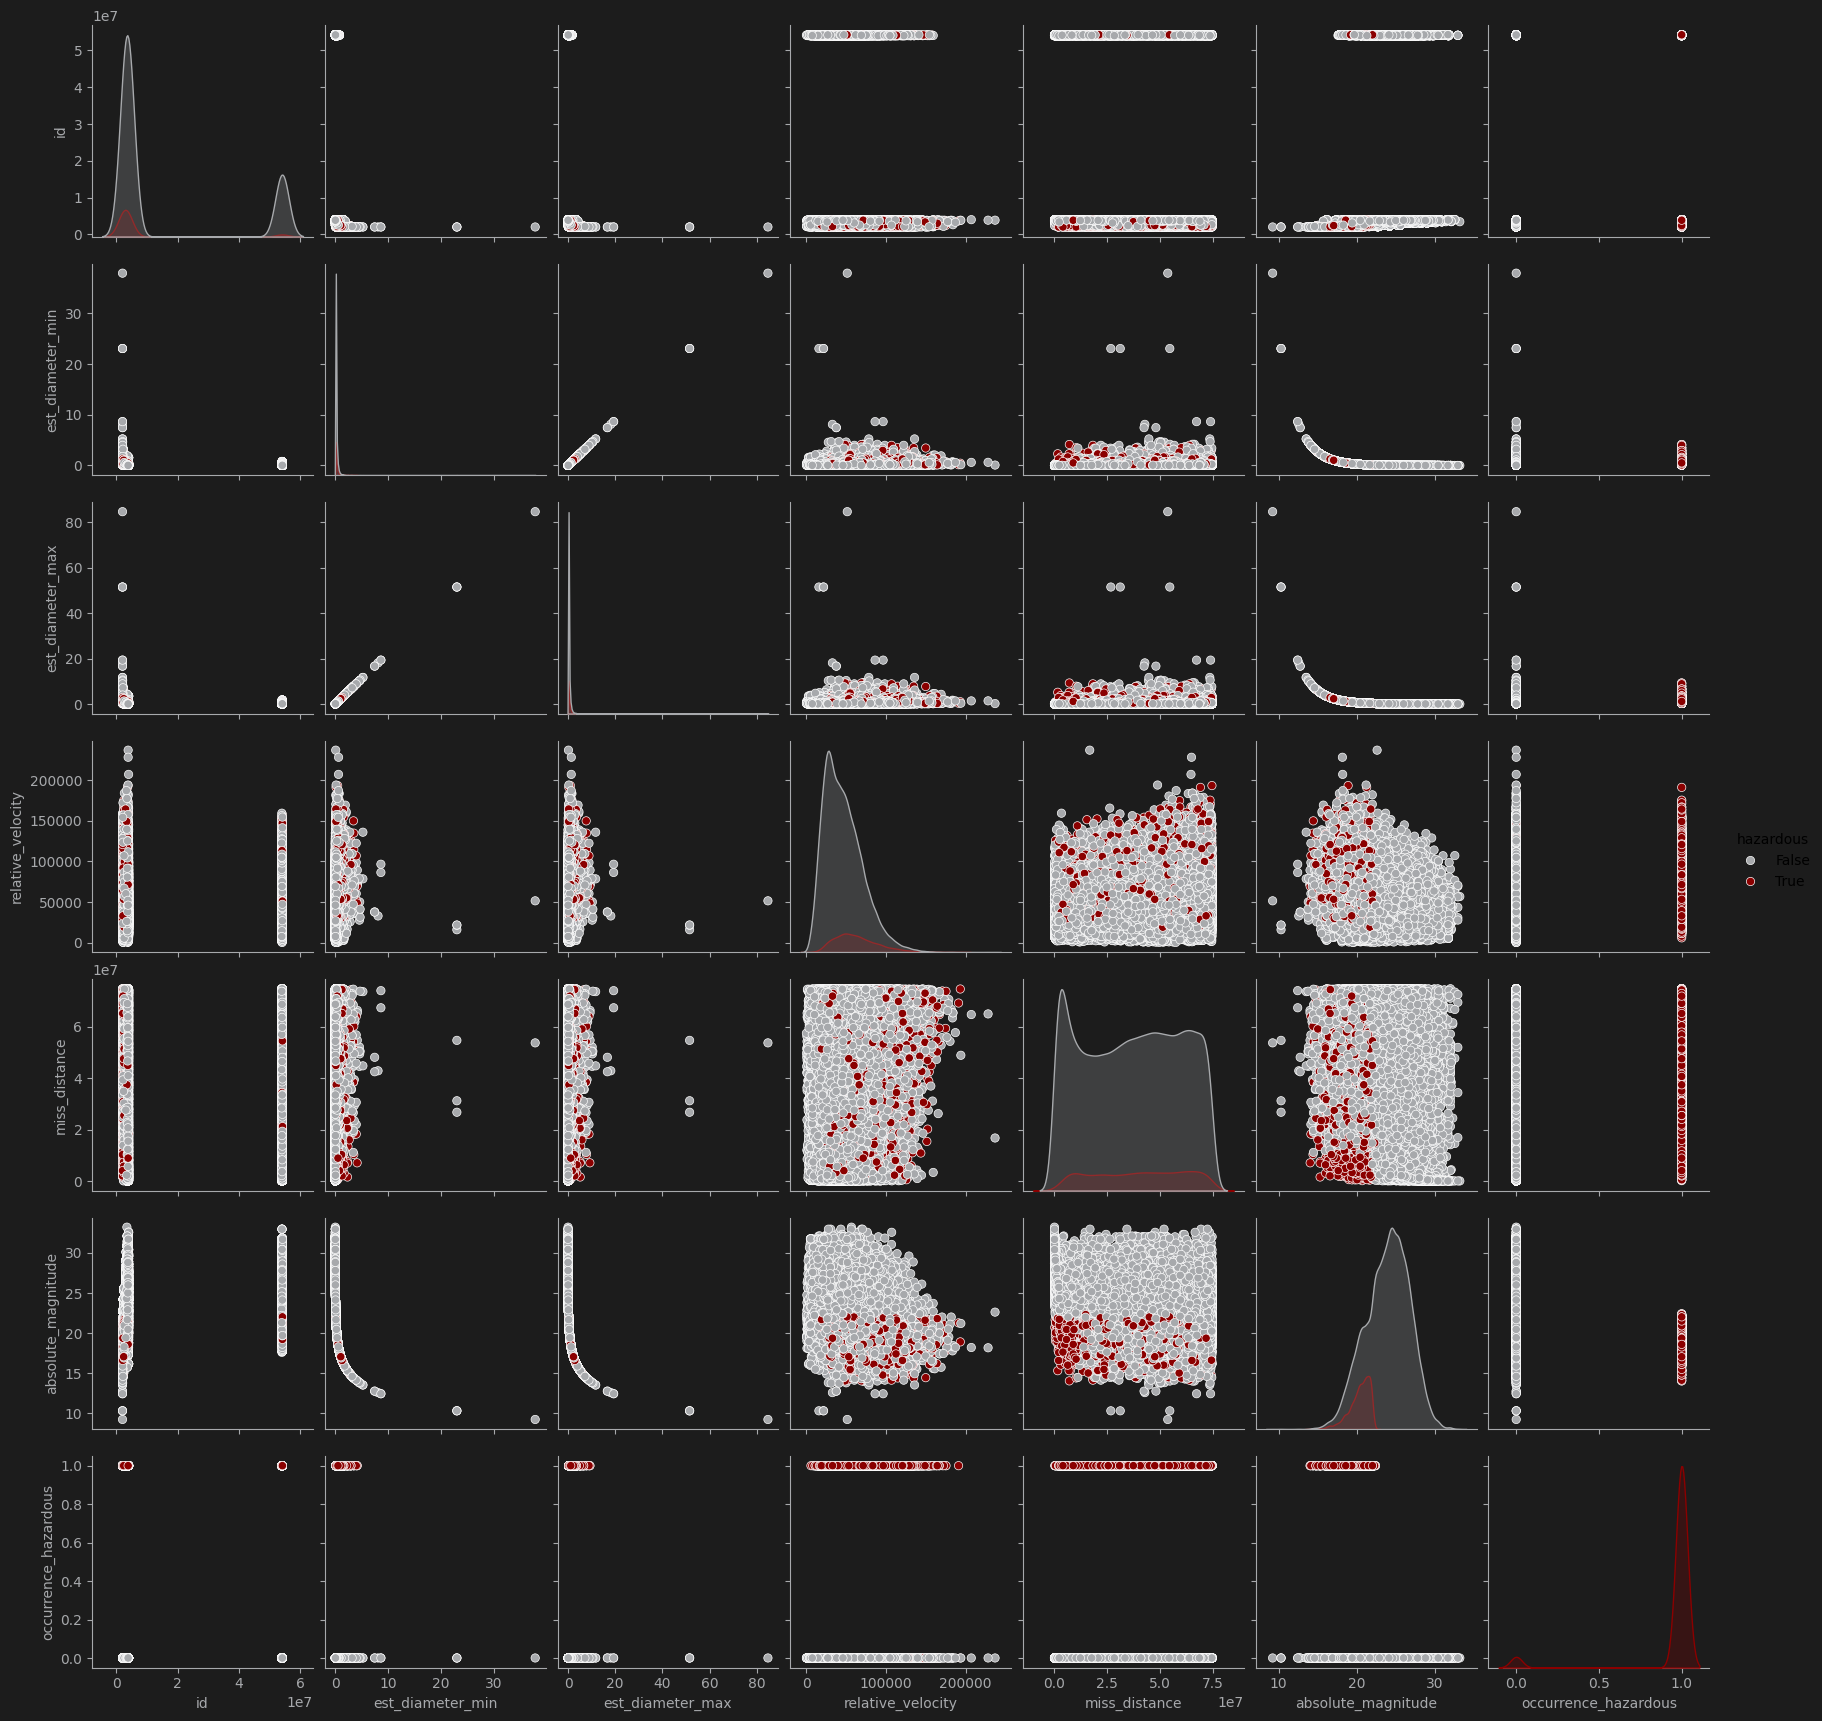

In [24]:
pairplot = sns.pairplot(
    df,
    hue='hazardous',
    palette=[my_colors["metallic_silver"], my_colors["burgundy_fire"]]
)

pairplot.fig.patch.set_facecolor(my_colors["cosmic_black"])  
for ax in pairplot.axes.flatten(): 
    ax.set_facecolor(my_colors["cosmic_black"]) 
    ax.tick_params(colors=my_colors["metallic_silver"])  
    ax.xaxis.label.set_color(my_colors["metallic_silver"])  
    ax.yaxis.label.set_color(my_colors["metallic_silver"])  
    ax.title.set_color(my_colors["metallic_silver"])
    ax.spines['bottom'].set_color(my_colors["metallic_silver"])
    ax.spines['left'].set_color(my_colors["metallic_silver"]) 
    ax.spines['top'].set_color(my_colors["metallic_silver"])  
    ax.spines['right'].set_color(my_colors["metallic_silver"])


<span style="color:yellow; font-size:16px;">The pairplot provides an insightful overview of the relationships between variables in the dataset, with data points differentiated by the hazardous column (True in red and False in white). Here are some observations that match what we have already noticed:</span>

<span style="color:yellow; font-size:16px;">

1.	Variable Distributions:
•	Most variables have skewed distributions, especially est_diameter_min, est_diameter_max, and miss_distance, indicating that many objects are small, far from Earth, or both.
•	The absolute_magnitude variable has a more uniform distribution compared to others.


2.	Class Separation:
•	Hazardous objects (red) are more prominent among objects with lower miss_distance values, aligning with the expectation that objects closer to Earth are more likely classified as hazardous.
•	The absolute_magnitude variable shows some clustering of hazardous objects in the lower-magnitude range (brighter objects).

3.	Imbalance in Classes:
•	The significant dominance of non-hazardous (white) objects reflects the class imbalance issue observed earlier, where hazardous objects form a minority.</span>

In [25]:
# return numeric features
def get_quant_features(df):
    feats = df.select_dtypes([np.number]).columns
    return [x for x in feats]

In [26]:
#function to draw histograms
def draw_histograms(df, variables, hue, n_rows, n_cols):
    
    fig = plt.figure(figsize=(15, 10))
    fig.patch.set_facecolor(my_colors["cosmic_black"])  # Background for the figure

    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.set_facecolor(my_colors["cosmic_black"])  # Background for each plot

        # Plot histogram with hue using seaborn
        sns.histplot(
            data=df,
            x=var_name,
            hue=hue,
            bins=50,
            ax=ax,
            palette=[my_colors["metallic_silver"], my_colors["burgundy_fire"]],  # Example colors for hue
            multiple="stack",
            edgecolor=my_colors["metallic_silver"],
            kde=True
        )

        ax.set_title(var_name, color=my_colors["metallic_silver"], fontsize=12)  # Title color
        ax.tick_params(colors=my_colors["metallic_silver"])  # Axis tick color
        ax.set_xlabel("")  # removing x-axis label
        ax.spines['bottom'].set_color(my_colors["metallic_silver"])  # Axis colors
        ax.spines['left'].set_color(my_colors["metallic_silver"])
        ax.spines['bottom'].set_linewidth(1.5)  # Axis thickness
        ax.spines['left'].set_linewidth(1.5)

    fig.tight_layout()
    plt.show()

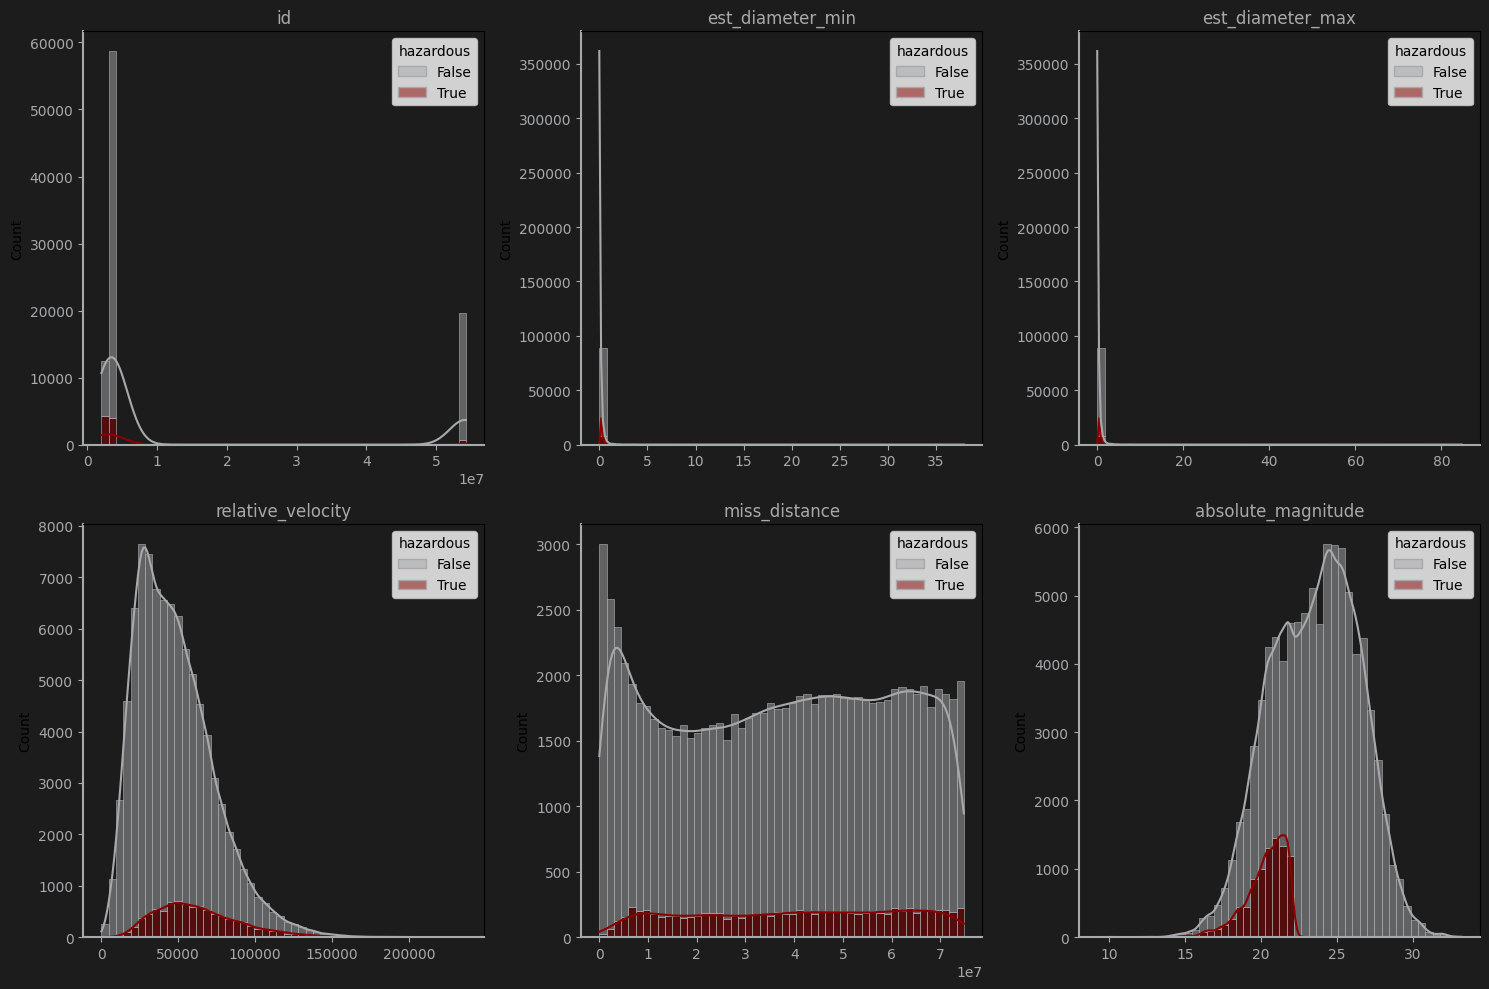

In [27]:
feats = get_quant_features(df)

draw_histograms(df, feats, hue="hazardous", n_rows=2, n_cols=3)

<span style="color:yellow; font-size:16px;">est_diameter_min and est_diameter_max: Both features have a similar distribution. Most asteroids have small estimated diameters, with a long right tail indicating a few very large asteroids. Hazardous asteroids (True) tend to have slightly larger diameters but are still relatively rare in the dataset.
relative_velocity: The majority of asteroids have relative velocities between 20,000 and 50,000 units, with a sharp decline as the velocity increases. Hazardous asteroids appear more frequently at higher velocities, suggesting that faster-moving asteroids might be more dangerous.
miss_distance: This feature shows that most asteroids pass Earth at relatively small distances. Hazardous asteroids are spread throughout the range.
absolute_magnitude: The distribution is nearly normal, with a peak around 20-25. Hazardous asteroids tend to have higher absolute magnitudes (lower brightness), which could suggest that they are harder to detect.
Overall, hazardous asteroids are relatively rare compared to non-hazardous ones and tend to have larger diameters, higher velocities, and absoluto magnitude around 20 units,it seems that the miss distance  does not matter that much, both hazardous and non-hazardous can fly close to the Earth. . These characteristics are important for predicting which asteroids pose a potential threat to Earth. Let's also create a KDE chart and check relative volocity, absolute magnitude and miss distance</span>


In [28]:
#function to draw kde chart (Kernel Density Estimation Chart)
def draw_kde(df, variables, hue, n_rows, n_cols):
 
    fig = plt.figure(figsize=(18, 4))
    fig.patch.set_facecolor(my_colors["cosmic_black"])

    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.set_facecolor(my_colors["cosmic_black"])

        sns.kdeplot(
            data=df,
            x=var_name,
            hue=hue,
            ax=ax,
            palette=[my_colors["metallic_silver"], my_colors["burgundy_fire"]],
            #linestyle='--',
            common_norm=False,
            fill=True, 
            alpha=0.4, 
        )

        ax.set_title(var_name, color=my_colors["metallic_silver"], fontsize=12)  
        ax.tick_params(colors=my_colors["metallic_silver"])  
        ax.set_xlabel("")  
        ax.set_ylabel("Density", color=my_colors["metallic_silver"], fontsize=10)  
        ax.spines['bottom'].set_color(my_colors["metallic_silver"]) 
        ax.spines['left'].set_color(my_colors["metallic_silver"])
        ax.spines['bottom'].set_linewidth(1.5)  
        ax.spines['left'].set_linewidth(1.5)

    fig.tight_layout()
    plt.show()

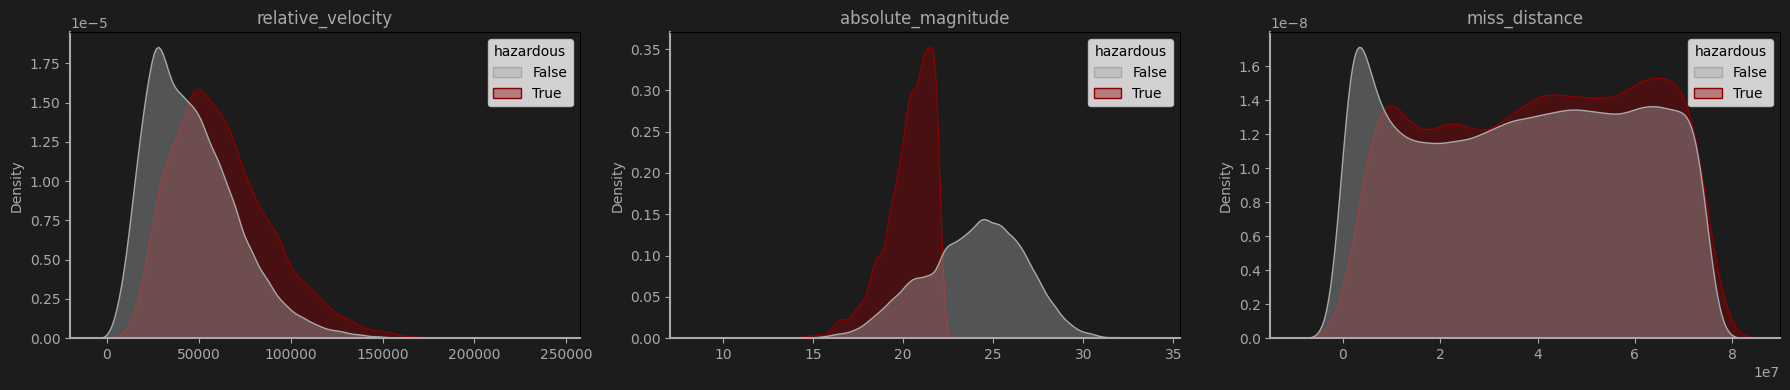

In [29]:
variables = ["relative_velocity", "absolute_magnitude", "miss_distance"]

draw_kde(df, variables, hue = "hazardous", n_rows=1, n_cols=3)

<span style="color:yellow; font-size:16px;">Relative Velocity:
Non-hazardous asteroids (gray) and hazardous asteroids (red) show a similar distribution.
Hazardous asteroids have a slightly wider distribution, meaning some of them move at higher velocities compared to non-hazardous ones.
This suggests that little higher relative velocity could be a potential factor in classifying an asteroid as hazardous.
Absolute Magnitude:
The distribution shows a clear distinction between hazardous and non-hazardous asteroids.
Hazardous asteroids (red) tend to have lower absolute magnitudes (around 18 to 22), which indicates that they are dimmer or less bright compared to non-hazardous ones.
Non-hazardous asteroids have a more spread-out distribution toward higher magnitudes, implying they are generally brighter and easier to detect.
Miss Distance:
The miss distance distribution for both hazardous and non-hazardous asteroids is very similar, with the majority of asteroids passing within a similar range.
However, the KDE curve for hazardous asteroids is slightly elevated across all distances, suggesting that even distant objects can be considered hazardous, depending on other factors like size or velocity</span>

<span style="color:yellow; font-size:16px;">Interesting fact, let's find 3 dangerous objects that passed our planet closest and create a nice chart :) </span>



In [30]:
# select top 3 hazardous objects that passed Earth closest (based on miss_distance)
df_top_3 = df[df["hazardous"] == True].sort_values(by="miss_distance", ascending=True).head(3)

In [31]:
print(df_top_3)

            id                name  est_diameter_min  est_diameter_max  \
2472   3789399         (2017 VW13)          0.192555          0.430566   
36740  2308635  308635 (2005 YU55)          0.124324          0.277997   
17150  2612901  612901 (2004 XP14)          0.291444          0.651688   

       relative_velocity  miss_distance  absolute_magnitude  hazardous  \
2472        40792.770407  143272.707499               20.70       True   
36740       49379.390941  324930.657662               21.65       True   
17150       62664.322601  432438.389028               19.80       True   

       occurrence_hazardous  
2472                   True  
36740                  True  
17150                  True  


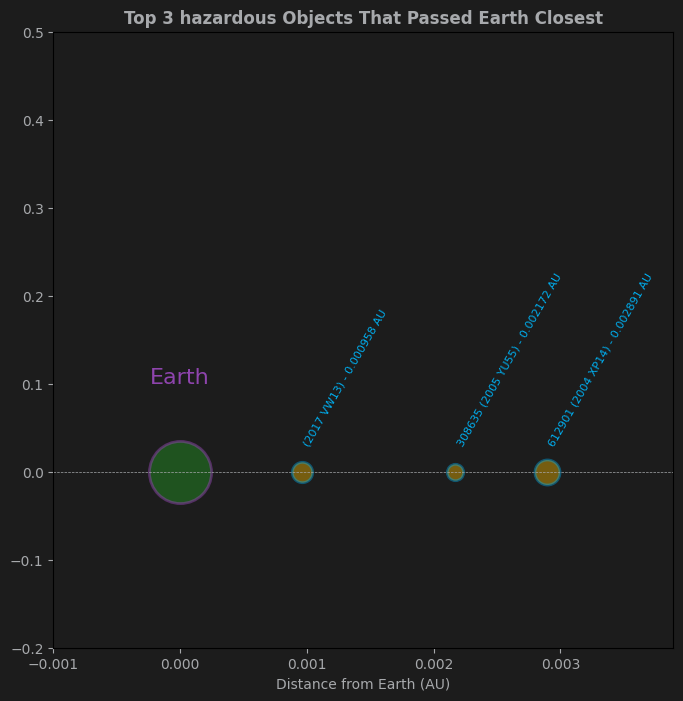

In [32]:
# convert miss_distance to AU (1 AU ≈ 149597870.7 km)
df_top_3["miss_distance_au"] = df_top_3["miss_distance"] / 149597870.7

# selecting top 3 objects 
top_objects = df_top_3.nsmallest(3, "miss_distance_au")

# Creating chart
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor(my_colors["cosmic_black"]) 
ax.set_facecolor(my_colors["cosmic_black"]) 

# Creating Earth point 
earth_size = 2000  # Earth size
ax.scatter(0, 0, s=earth_size, color=my_colors["earth_green"], alpha=0.5,edgecolor=my_colors["purple_glow"], linewidths=2)  
ax.text(0, 0.1, "Earth", color=my_colors["purple_glow"], ha='center', fontsize=16)


# Adding three objects to the chart
for _, row in top_objects.iterrows():
    ax.scatter(
        row["miss_distance_au"], 0,  
        s=row["est_diameter_max"] * 500,  # Scaling the point according to the maximum diameter
        alpha=0.4,
        color=my_colors["lightning_gold"],
        edgecolor=my_colors["lightning_blue"],
        linewidths=2  
    )
    # Adding three objects names 
    ax.text(
        row["miss_distance_au"], 0.03,  
        f'{row["name"]} - {row["miss_distance_au"]:.6f} AU',
        color=my_colors["lightning_blue"],
        fontsize=8,
        ha='left',
        rotation=60,
    )

# Final chart Settings
ax.axhline(0, color=my_colors["metallic_silver"], linestyle='--', linewidth=0.5)  
ax.set_xlabel("Distance from Earth (AU)", color=my_colors["metallic_silver"],fontsize=10)
ax.set_title("Top 3 hazardous Objects That Passed Earth Closest", color=my_colors["metallic_silver"],fontsize=12,fontweight='bold')
ax.tick_params(colors=my_colors["metallic_silver"])
ax.set_xlim(-0.001, top_objects["miss_distance_au"].max() + 0.001)  
ax.set_ylim(-0.2, 0.5)

plt.show()

<span style="color:lightblue; font-size:26px;">4. Build the model.</span>

In [33]:
# Accoring to EDA let's remove columns: id, name,est_diameter_min, est_diameter_max
df = df.drop(columns=["id", "name", "est_diameter_max", "est_diameter_min"])

In [34]:
df.head(5)

,relative_velocity,miss_distance,absolute_magnitude,hazardous,occurrence_hazardous
0,13569.249224,5.483974e+07,16.73,False,False
1,73588.726663,6.143813e+07,20.00,True,True
2,114258.692129,4.979872e+07,17.83,False,False
3,24764.303138,2.543497e+07,22.20,False,False
4,42737.733765,4.627557e+07,20.09,True,True


In [35]:
X= df.drop("hazardous", axis=1)
y = df["hazardous"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

<span style="color:yellow; font-size:16px;">To prepare the model, I chose five popular and well-performing classification algorithms: KNeighborsClassifier, RandomForestClassifier, DecisionTreeClassifier, XGBClassifier, and LGBMClassifier. </span>

<span style="color:yellow; font-size:16px;">As a scoring metric, we will use recall . This is because of an imbalanced classes and because we care much more about avoiding false negatives than false positives (we would rather have objects wrongly classified as hazardous than not-hazardous). </span>

In [37]:
# Numerical columns
cols_numerical = X_train.select_dtypes(include=['int64', 'float64']).columns
 
# Transformer for numerical columns
transformer_numerical = Pipeline(steps = [
    ('num_trans', StandardScaler())
])

In [38]:
# preprocessor
preprocessor = ColumnTransformer(transformers = [
    ('numerical', transformer_numerical, cols_numerical)
])

In [54]:
# classifiers                           
classifiers = [
    KNeighborsClassifier(weights="distance"),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(random_state=42)
]
 
# Scalers
scalers = [StandardScaler(), MinMaxScaler()]

In [55]:
# miejsce na zebranie wyników
models_df = pd.DataFrame()
 
# przygotowujemy pipeline
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor), # mniejszy pipeline
    ('classifier', classifiers ) # to ustalimy za moment
])
 
# dla każdego typu modelu zmieniamy kolejne transformatory kolumn
for model in classifiers:
    for num_tr in scalers:
            # odpowiednio zmieniamy jego paramety - dobieramy transformatory
            pipe_params = {
                'preprocessor__numerical__num_trans': num_tr,
                'classifier': model
            }
            pipe.set_params(**pipe_params)
 
            # trenujemy tak przygotowany model (cały pipeline) mierząc ile to trwa
            start_time = time.time()
            pipe.fit(X_train, y_train)   
            end_time = time.time()
 
            # Predykcja na zbiorze testowym
            y_pred = pipe.predict(X_test)

            # Obliczenie wszystkich metryk
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)

            # Obliczenie macierzy konfuzji
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # Tworzenie dict z wynikami
            param_dict = {
            'model': model.__class__.__name__,
            'num_trans': num_tr.__class__.__name__,
            'recall_score': recall,
            'precision_score': precision,
            'f1_score': f1,
            'accuracy_score': accuracy,
            'time_elapsed': end_time - start_time,
            'true_positives': tp,
            'true_negatives': tn,
            'false_positives': fp,
            'false_negatives': fn
        }

            # Konwersja dict na DataFrame
            result_df = pd.DataFrame(param_dict, index=[0])

            # Dodawanie wyników do models_df za pomocą pd.concat()
            models_df = pd.concat([models_df, result_df], ignore_index=True)

# Resetowanie indeksu (dla pewności)
models_df.reset_index(drop=True, inplace=True)

[LightGBM] [Info] Number of positive: 7554, number of negative: 69656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 77210, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.097837 -> initscore=-2.221492
[LightGBM] [Info] Start training from score -2.221492
[LightGBM] [Info] Number of positive: 7554, number of negative: 69656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 77210, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.097837 -> initscore=-2.221492
[LightGB

In [56]:
models_df.sort_values('recall_score', ascending=False)

,model,num_trans,recall_score,precision_score,f1_score,accuracy_score,time_elapsed,true_positives,true_negatives,false_positives,false_negatives
4,DecisionTreeClassifier,StandardScaler,0.469673,0.447076,0.458096,0.895127,0.172892,604,11593,747,682
5,DecisionTreeClassifier,MinMaxScaler,0.469673,0.448404,0.458792,0.895421,0.172072,604,11597,743,682
0,KNeighborsClassifier,StandardScaler,0.342146,0.478781,0.399093,0.902759,0.046340,440,11861,479,846
3,RandomForestClassifier,MinMaxScaler,0.331260,0.620991,0.432049,0.917804,5.481284,426,12080,260,860
2,RandomForestClassifier,StandardScaler,0.329705,0.614493,0.429150,0.917217,5.625835,424,12074,266,862
1,KNeighborsClassifier,MinMaxScaler,0.322706,0.459579,0.379169,0.900264,0.022101,415,11852,488,871
6,XGBClassifier,StandardScaler,0.231726,0.636752,0.339795,0.915015,0.141126,298,12170,170,988
7,XGBClassifier,MinMaxScaler,0.231726,0.636752,0.339795,0.915015,0.142729,298,12170,170,988
9,LGBMClassifier,MinMaxScaler,0.183515,0.728395,0.293168,0.916483,0.187256,236,12252,88,1050
8,LGBMClassifier,StandardScaler,0.178072,0.713396,0.285003,0.915676,0.197910,229,12248,92,1057


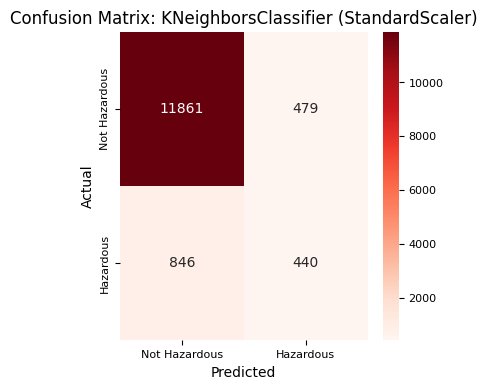

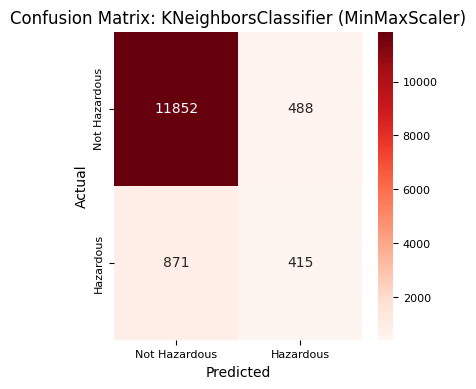

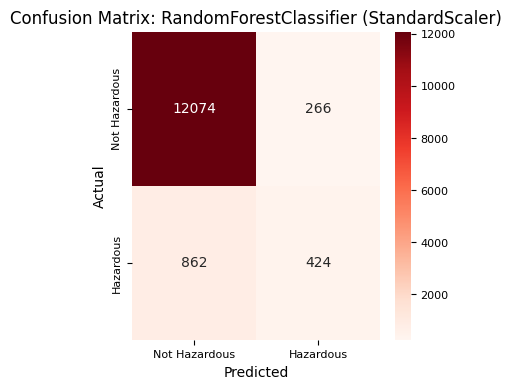

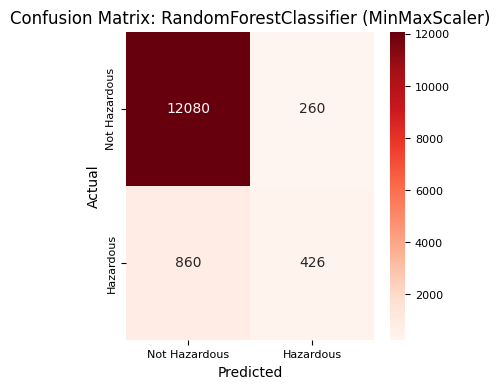

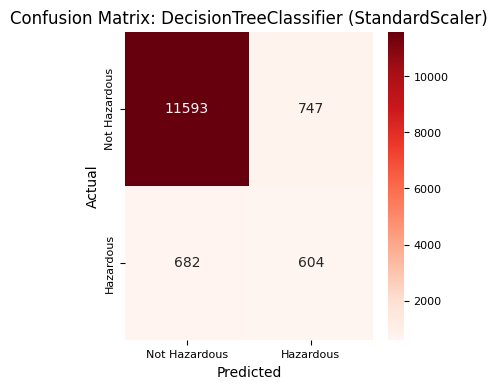

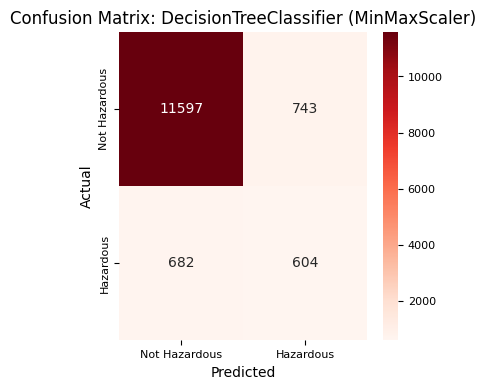

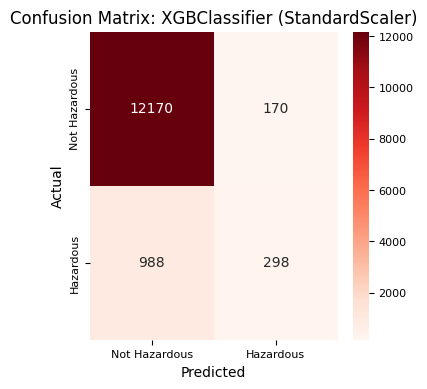

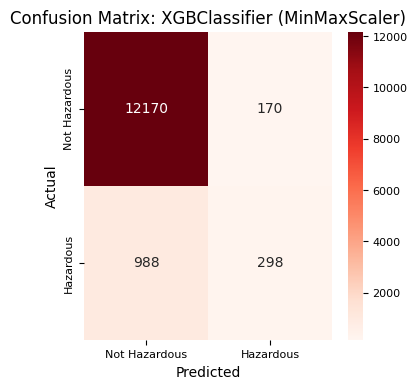

[LightGBM] [Info] Number of positive: 7554, number of negative: 69656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 77210, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.097837 -> initscore=-2.221492
[LightGBM] [Info] Start training from score -2.221492


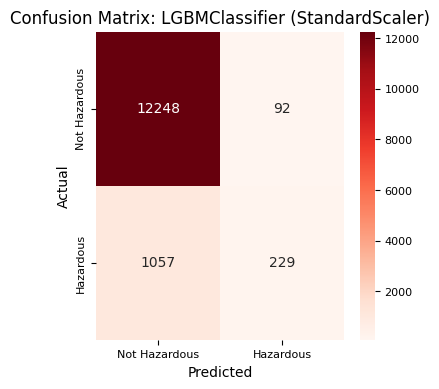

[LightGBM] [Info] Number of positive: 7554, number of negative: 69656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 77210, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.097837 -> initscore=-2.221492
[LightGBM] [Info] Start training from score -2.221492


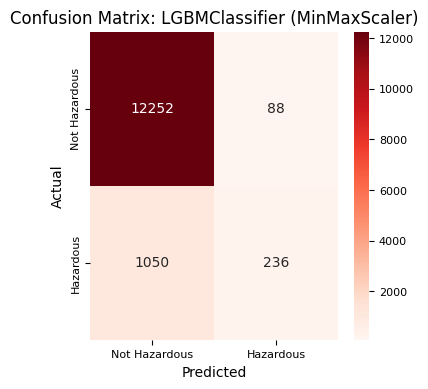

In [57]:
# Iteracja po każdym modelu zapisanym w models_df
for index, row in models_df.iterrows():
    model_name = row['model']
    num_trans = row['num_trans']
    
    # Dopasowanie skalera na podstawie nazwy klasy
    scaler_to_use = next(scaler for scaler in scalers if scaler.__class__.__name__ == num_trans)
    
    # Dopasowanie klasyfikatora na podstawie nazwy klasy
    classifier_to_use = next(clf for clf in classifiers if clf.__class__.__name__ == model_name)
    
    # Ustawienie właściwego skalera i modelu w pipeline
    pipe.set_params(preprocessor__numerical__num_trans=scaler_to_use,
                    classifier=classifier_to_use)
    
    # Trening modelu na całym zbiorze treningowym
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Obliczanie macierzy konfuzji
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Tworzenie heatmapy
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
                xticklabels=['Not Hazardous', 'Hazardous'], 
                yticklabels=['Not Hazardous', 'Hazardous'], 
                annot_kws={"size": 10})
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    # Dodawanie tytułu do wykresu
    plt.title(f'Confusion Matrix: {model_name} ({num_trans})', fontsize=12)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)

    # Zmniejszenie czcionki skali
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)
    
    # Wyświetlenie wykresu
    plt.show()

<Axes: xlabel='recall_score', ylabel='model'>

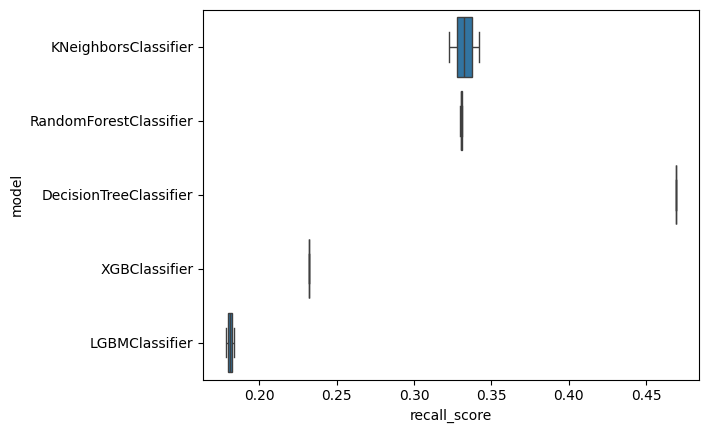

In [58]:
sns.boxplot(data=models_df, x='recall_score', y='model')

<Axes: xlabel='recall_score', ylabel='num_trans'>

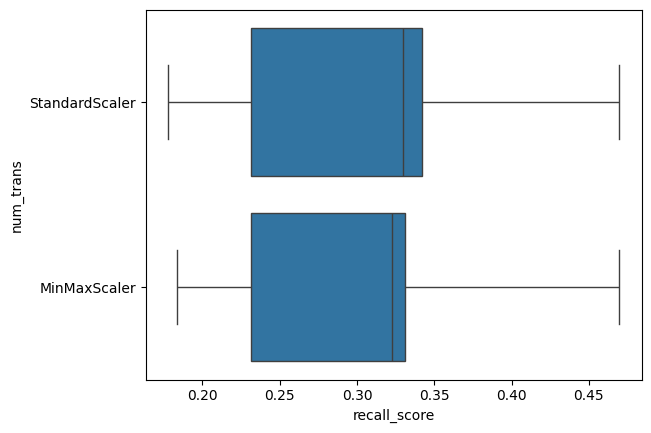

In [59]:
sns.boxplot(data=models_df, x='recall_score', y='num_trans')

<Axes: xlabel='time_elapsed', ylabel='model'>

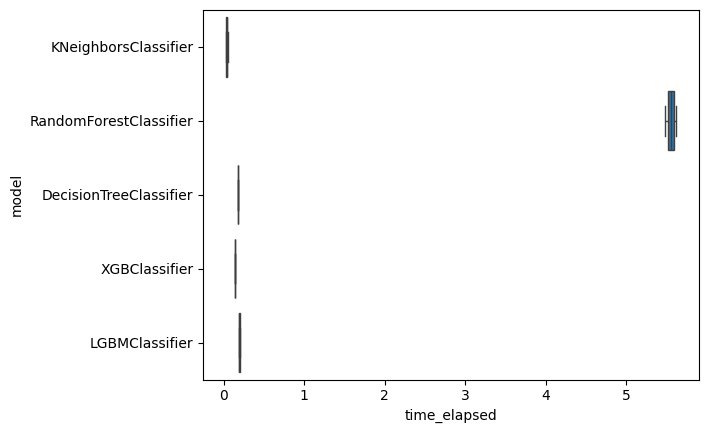

In [60]:
sns.boxplot(data=models_df, x='time_elapsed', y='model')

<span style="color:yellow; font-size:16px;">The above charts and table the performance of various classification models, including different scaling techniques, in predicting hazardous  and non-hazardous objects. The evaluation metrics used are recall, precision, F1 score, accuracy, and other indicators such as true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). Here is the key analysis of the results: </span>

<span style="color:yellow; font-size:16px;">
	1.	Accuracy Scores:
	•	The accuracy of all models is notably high, ranging from 89.5% to 91.6%. This suggests that the models are generally good at classifying objects. However, accuracy alone is not the best metric in this context due to the class imbalance and the critical importance of minimizing false negatives.
 </span>

<span style="color:yellow; font-size:16px;">
2.	Recall:
	•	Recall is the most crucial metric in this problem since it measures the ability to correctly identify dangerous objects. Misclassifying a dangerous object as safe (false negative) has a significantly higher cost than the opposite error.
	•	The DecisionTreeClassifier with MinMaxScaler and StandardScaler achieved the highest recall score of 0.470 (identical results).
	•	Both models have a high number of true positives (TP) while keeping the number of false negatives (FN) relatively low compared to other models.</span>

<span style="color:yellow; font-size:16px;">
3.	Precision and F1 Score:
	•	While LGBMClassifier and XGBClassifier exhibit higher precision values (above 0.64), they sacrifice recall, resulting in a lower F1 score. This trade-off suggests that these models are better at avoiding false positives but are less reliable in detecting dangerous objects.
	•	The F1 scores of the DecisionTreeClassifier variants are relatively balanced, making them better suited for this application.</span>

<span style="color:yellow; font-size:16px;">
4.	False Negatives:
	•	Models with higher recall tend to have fewer false negatives. For example, the DecisionTreeClassifier models maintain FN counts of 682, whereas models like LGBMClassifier and XGBClassifier exhibit much higher FN counts, around 1000.</span>

<span style="color:yellow; font-size:16px;">
5.	Computation Time:
	•	KNeighborsClassifier is the fastest model, with an average runtime of less than 0.02 seconds. However, its recall performance is significantly lower, making it unsuitable for this application.
	•	RandomForestClassifier is slower (5 seconds), but its high precision and accuracy indicate its potential value for other use cases.</span>

<span style="color:yellow; font-size:16px;"> Next Steps: To improve the performance of the selected model (DecisionTreeClassifier with StandardScaler), we will:
	1.	Further optimize hyperparameters to enhance both recall and F1 score.
	2.	Apply advanced techniques for handling class imbalance, such as StratifiedKFold.
	3.	Focus on reducing the number of false negatives while maintaining an acceptable level of false positives, as it is preferable to classify a safe object as dangerous rather than the other way around.</span>

In [61]:
# models_df print results for decision tree classifier

filtered_models_df = models_df[
    (models_df['model'] == 'DecisionTreeClassifier') & 
    (models_df['num_trans'] == 'StandardScaler')
]
filtered_models_df.head()

,model,num_trans,recall_score,precision_score,f1_score,accuracy_score,time_elapsed,true_positives,true_negatives,false_positives,false_negatives
4,DecisionTreeClassifier,StandardScaler,0.469673,0.447076,0.458096,0.895127,0.172892,604,11593,747,682


In [65]:
#Final model (Decision Tree Classifier with Standard Scaler)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

final_model=DecisionTreeClassifier()
skf=StratifiedKFold(n_splits=5)

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(final_model, parameters, cv=skf, scoring='recall')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print("Best Parameters:", grid_search.best_params_)
print("Best Score (Recall):", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score (Recall): 0.9638009049773755


<span style="color:yellow; font-size:16px;">Using the StratifiedKFold algorithm for unbalanced classes and hyperparameter optimization with GridSearchCV our DecisionTreeClassifier achieved a great Recall score of 0.963 on the training set. Let's see how the remaining matrices and the confusion matrix look now.</span>

In [66]:
#Decision Tree Classifier with Standard Scaler results

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Recall: 0.9588235294117647
Precision: 0.9640582347588716
F1 Score: 0.9614337568058077
Accuracy: 0.9925139812409177


<span style="color:yellow; font-size:16px;">We also obtained very good results on the training set, recall is now 0.959, precision 0.964, F1 score 0.961 and accuracy 0.993.</span>

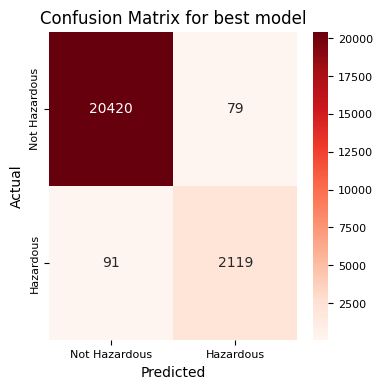

In [89]:
#Confusion Matrix for Decision Tree Classifier with Standard Scaler

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Not Hazardous', 'Hazardous'], 
            yticklabels=['Not Hazardous', 'Hazardous'], 
            annot_kws={"size": 10})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)

cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

plt.title('Confusion Matrix for best model', fontsize=12)

plt.show()

<span style="color:yellow; font-size:16px;">As we can see above in the confusion matrix only 91 hazardous (FN) objects were classified as non-hazardous, which means we got what we wanted the most. The FN value before optimization was around 680, so we can see a significant drop.</span>

/var/folders/0g/jfvflb395b17x51gk8q945nr0000gn/T/ipykernel_21694/296651663.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, orient='h', palette='coolwarm')


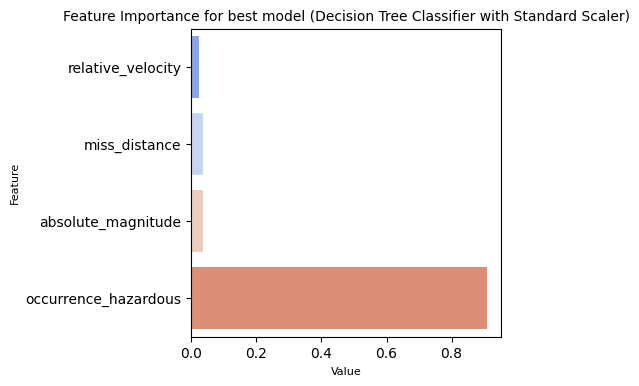

In [86]:
#Feature Importance for Decision Tree Classifier with Standard Scaler

feature_importances = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(4, 4))
sns.barplot(x=feature_importances, y=feature_names, orient='h', palette='coolwarm')
plt.xlabel('Value', fontsize=8)
plt.ylabel('Feature', fontsize=8)
plt.title('Feature Importance for best model (Decision Tree Classifier with Standard Scaler)', fontsize=10)
plt.show()

<span style="color:yellow; font-size:16px;">We see how important "occurrence_hazardous" is. The model  almost exclusively makes use of this variable.</span>

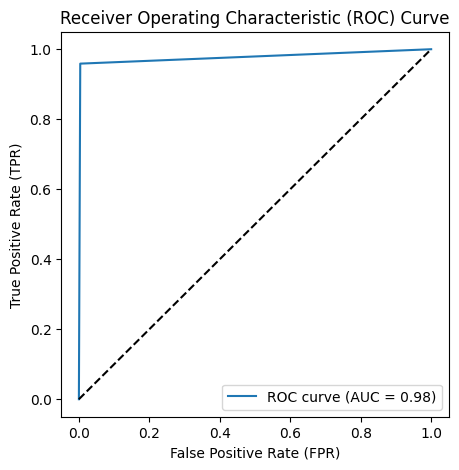

In [96]:
#AUC for Decision Tree Classifier with Standard Scaler
FBR,TPR,threshould=roc_curve(y_test,y_pred)

plt.figure(figsize=(5, 5))
plt.plot(FBR, TPR, label='ROC curve (AUC = {:.2f})'.format(auc(FBR, TPR)))
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<span style="color:yellow; font-size:16px;">The AUC curve is correct and indicates a very good classification model.</span>

In [88]:
#save model to pickle
with open('final_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

<span style="color:yellow; font-size:16px;">Conclusions:</span>

<span style="color:yellow; font-size:16px;">
This analysis highlights several key steps and outcomes in the development of a machine learning model to predict hazardous objects. Below are the main points:
	1.	Initial Dataset and Challenges:
	•	The dataset was initially unbalanced, with 90% of objects classified as non-hazardous and only 10% as hazardous. This imbalance posed a significant challenge, as models tended to focus on predicting the majority class, leading to high accuracy but poor performance in identifying hazardous objects.
	•	A new feature, “occurrence_hazardous”, was added based on historical data to enhance the predictability of the hazardous class. This feature proved crucial for improving the model’s performance.
	2.	Model Selection and Scaling:
	•	Among five tested classification algorithms, the DecisionTreeClassifier combined with StandardScaler was selected, as it consistently delivered the best results during initial evaluations.
	•	The model showed high recall, effectively identifying hazardous objects while maintaining a balanced F1 score (compared to other models).
	3.	Evaluation of Metrics:
	•	Accuracy, while high for all models (89.5%-91.6%), was not a reliable metric due to class imbalance.
	•	Recall was the most critical metric, given the importance of minimizing false negatives (FN), as misclassifying hazardous objects as safe could have serious consequences.
	•	The DecisionTreeClassifier achieved the best balance of metrics, with significantly fewer false negatives compared to other models. Post-optimization, the FN count dropped from 680 to just 91, demonstrating a substantial improvement.
	4.	Optimization and Results:
	•	Advanced techniques like StratifiedKFold and hyperparameter tuning via GridSearchCV were applied to handle the class imbalance effectively.
	•	After optimization, the DecisionTreeClassifier achieved the following metrics on the training set:
	•	Recall: 0.963
	•	Precision: 0.964
	•	F1 Score: 0.961
	•	Accuracy: 0.993
	•	These results confirm the model’s ability to correctly identify hazardous objects while minimizing errors.
	5.	Importance of the New Feature:
	•	The added feature, “occurrence_hazardous”, emerged as the most critical variable, significantly improving the model’s predictions.
	6.	AUC-ROC Curve:
	•	The AUC-ROC curve validated the model’s performance, confirming its effectiveness in classifying hazardous and non-hazardous objects.


The DecisionTreeClassifier with StandardScaler proved to be the best-performing model for this problem. By addressing the class imbalance and introducing the “occurrence_hazardous” feature, the model achieved significant improvements in recall and reduced false negatives. These steps ensured that the primary goal—accurately identifying hazardous objects—was effectively met.</span>